In [1]:
from time import time
import numpy as np
from matplotlib import pyplot as plt

import torchgp
from utils import get_data, plot_result

In [2]:
np.random.seed(0)

In [3]:
init_output_scale = 1.0
init_input_scale = 0.8
init_noise_variance = 0.001
num_pseudo = 10

In [4]:
x_train, y_train, x_test, batch_size = get_data()

# Appending Data

Randomly select pseudo inputs from training inputs and then optimizing the pseudo inputs in the remaining iterations.

Iter: 4999 loss:  97.90: 100%|███████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:33<00:00, 149.25it/s]


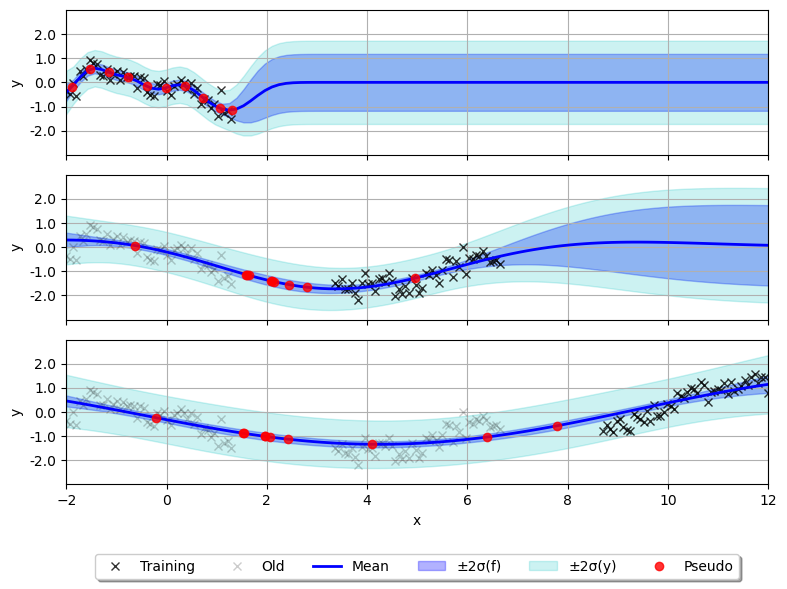

In [5]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
for batch_index in range(3):
    x_batch = x_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]
    y_batch = y_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]
    # Learning
    if batch_index == 0:
        idx_pseudo = np.random.choice(len(x_batch), num_pseudo)
        x_pseudo = x_batch[idx_pseudo, :]
        kernel = torchgp.kernels.GaussianKernel(input_scale=init_input_scale, output_scale=init_output_scale)
        model = torchgp.models.SGPRModel(x_pseudo, kernel, noise_variance=init_noise_variance)
    model.add_data(x_batch, y_batch)
    model.learn(optimizer="adam", num_steps=5000, verbose=True)
    # Prediction
    mean, var = model.predict(x_test, include_likelihood=False)
    # Visualization
    plot_result(
        axes[batch_index],
        x_batch,
        y_batch,
        x_test,
        mean,
        var,
        model.likelihood.noise_variance.item(),
        model.x_pseudo,
        model.f_pseudo,
        x_old=x_train[: batch_index * batch_size, :] if batch_index > 0 else None,
        y_old=y_train[: batch_index * batch_size, :] if batch_index > 0 else None,
        plot_legend = True if batch_index == 2 else False,
    )
    axes[batch_index].grid()
axes[2].legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.7),
    fancybox=True,
    shadow=True,
    ncol=6,
)
axes[2].set_xlabel("x")
fig.tight_layout()
plt.show()

Pseudo inputs cover the whole input domain and optimize pseudo inputs in the remaining steps.

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
for batch_index in range(3):
    x_batch = x_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]
    y_batch = y_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]
    # Learning
    if batch_index == 0:
        x_pseudo = np.linspace(-2, 12, num_pseudo).reshape(-1, 1)
        kernel = torchgp.kernels.GaussianKernel(input_scale=init_input_scale, output_scale=init_output_scale)
        model = torchgp.models.SGPRModel(x_pseudo, kernel, noise_variance=init_noise_variance)
    model.add_data(x_batch, y_batch)
    model.learn()
    # Prediction
    mean, var = model.predict(x_test, include_likelihood=False)
    # Visualization
    plot_result(
        axes[batch_index],
        x_batch,
        y_batch,
        x_test,
        mean,
        var,
        model.likelihood.noise_variance.item(),
        model.x_pseudo,
        model.f_pseudo,
        x_old=x_train[: batch_index * batch_size, :] if batch_index > 0 else None,
        y_old=y_train[: batch_index * batch_size, :] if batch_index > 0 else None,
        plot_legend = True if batch_index == 2 else False,
    )
    axes[batch_index].grid()
axes[2].legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.7),
    fancybox=True,
    shadow=True,
    ncol=6,
)
axes[2].set_xlabel("x")
fig.tight_layout()
plt.show()

In [ ]:
print(f"Noise variance of the Gaussian likelihood: {model.likelihood.noise_variance.item(): .2f}")
print(f"Input scale of the Gaussian kernel: {model.kernel.input_scale.item(): .2f}")
print(f"Output scale of the Gaussian kernel: {model.kernel.output_scale.item(): .2f}")

# Training on Full Dataset

In [ ]:
x_pseudo = np.linspace(-2, 12, num_pseudo).reshape(-1, 1)
kernel = torchgp.kernels.GaussianKernel(input_scale=init_input_scale, output_scale=init_output_scale)
full_model = torchgp.models.SGPRModel(x_pseudo, kernel, noise_variance=init_noise_variance)
full_model.add_data(x_train, y_train)
full_model.learn()
mean, var = full_model.predict(x_test, include_likelihood=False)
fig, ax = plt.subplots(figsize=(8, 2))
plot_result(
    ax,
    x_train,
    y_train,
    x_test,
    mean,
    var,
    full_model.likelihood.noise_variance.item(),
    full_model.x_pseudo,
    full_model.f_pseudo,
)
ax.grid()
plt.show()

In [ ]:
print(f"Noise variance of the Gaussian likelihood: {full_model.likelihood.noise_variance.item(): .2f}")
print(f"Input scale of the Gaussian kernel: {full_model.kernel.input_scale.item(): .2f}")
print(f"Output scale of the Gaussian kernel: {full_model.kernel.output_scale.item(): .2f}")

# SGPR on First Batch

In [ ]:
batch_index = 0
x_batch = x_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]
y_batch = y_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]

In [ ]:
# idx_pseudo = np.random.choice(len(x_batch), num_pseudo)
# x_pseudo = x_batch[idx_pseudo, :]
x_pseudo = np.linspace(-2, 12, num_pseudo).reshape(-1, 1)
kernel = torchgp.kernels.GaussianKernel(input_scale=init_input_scale, output_scale=init_output_scale)
model = torchgp.models.SGPRModel(x_pseudo, kernel, noise_variance=init_noise_variance)
model.add_data(x_batch, y_batch)
model.learn()
mean, var = model.predict(x_test, include_likelihood=False)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
plot_result(
    ax,
    x_batch,
    y_batch,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
)
ax.grid()
plt.show()

# Observed The Second Batch

In [ ]:
batch_index = 1
x_batch = x_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]
y_batch = y_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
plot_result(
    ax,
    x_batch,
    y_batch,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
)
ax.grid()
plt.show()

# Generate Synthetic Data

In [ ]:
mean_pseudo, var_pseudo = model.predict(model.x_pseudo, include_likelihood=True)
x_synthetic = np.repeat(model.x_pseudo, 5, axis=0)
y_synthetic = (mean_pseudo + np.sqrt(var_pseudo) * np.random.randn(len(mean_pseudo), 5)).reshape(*x_synthetic.shape)
x_all = np.vstack((x_batch, x_synthetic))
y_all = np.vstack((y_batch, y_synthetic))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
plot_result(
    ax,
    x_batch,
    y_batch,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
    x_old=x_synthetic,
    y_old=y_synthetic,
)
ax.grid()
plt.show()

In [ ]:
# idx_pseudo = np.random.choice(len(x_all), num_pseudo)
# x_pseudo = x_all[idx_pseudo, :]
x_pseudo = np.linspace(-2, 12, num_pseudo).reshape(-1, 1)
kernel = torchgp.kernels.GaussianKernel(input_scale=init_input_scale, output_scale=init_output_scale)
model = torchgp.models.SGPRModel(x_pseudo, kernel, noise_variance=init_noise_variance)
model.add_data(x_all, y_all)
model.learn()
mean, var = model.predict(x_test, include_likelihood=False)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
plot_result(
    ax,
    x_all,
    y_all,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
)
ax.grid()
plt.show()

# Observe The Third Batch

In [ ]:
batch_index = 2
x_batch = x_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]
y_batch = y_train[batch_index * batch_size : (batch_index + 1) * batch_size, :]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
plot_result(
    ax,
    x_batch,
    y_batch,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
)
ax.grid()
plt.show()

In [ ]:
mean_pseudo, var_pseudo = model.predict(model.x_pseudo, include_likelihood=True)
x_synthetic = np.repeat(model.x_pseudo, 5, axis=0)
y_synthetic = (mean_pseudo + np.sqrt(var_pseudo) * np.random.randn(len(mean_pseudo), 5)).reshape(*x_synthetic.shape)
x_all = np.vstack((x_batch, x_synthetic))
y_all = np.vstack((y_batch, y_synthetic))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
plot_result(
    ax,
    x_batch,
    y_batch,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
    x_old=x_synthetic,
    y_old=y_synthetic,
)
ax.grid()
plt.show()

In [ ]:
# idx_pseudo = np.random.choice(len(x_all), num_pseudo)
# x_pseudo = x_all[idx_pseudo, :]
x_pseudo = np.linspace(-2, 12, num_pseudo).reshape(-1, 1)
kernel = torchgp.kernels.GaussianKernel(input_scale=init_input_scale, output_scale=init_output_scale)
model = torchgp.models.SGPRModel(x_pseudo, kernel, noise_variance=init_noise_variance)
model.add_data(x_all, y_all)
model.learn()
mean, var = model.predict(x_test, include_likelihood=False)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))
plot_result(
    ax,
    x_batch,
    y_batch,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
    x_old=x_synthetic,
    y_old=y_synthetic,
)
ax.grid()
plt.show()

In [ ]:
print(f"Noise variance of the Gaussian likelihood: {model.likelihood.noise_variance.item(): .2f}")
print(f"Input scale of the Gaussian kernel: {model.kernel.input_scale.item(): .2f}")
print(f"Output scale of the Gaussian kernel: {model.kernel.output_scale.item(): .2f}")